In [1]:
import os.path as osp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import jax.numpy as jnp
import jax.tree_util as jtu

In [2]:
log_folder = osp.join("../data", "logs", "dnaqd", "simple_level_gen", "nca_dna", "evo")
run_folder = "2024-03-12_14-24"

metric_folder_template = osp.join("analysis", "periodic_ckpt-iteration_{0:06d}")
metric_folder_files = ["qd_metrics.npz", "achieved_quality_ratios.npz"]
runs = [20] + list(range(100, 3001, 100))

## QD metrics

In [3]:
all_qd_metrics = []
all_achieved_quality_ratios = []

for r in runs:
    for results, file in zip([all_qd_metrics, all_achieved_quality_ratios], metric_folder_files):
        full_path = osp.join(log_folder, run_folder, metric_folder_template.format(r), file)
        data = np.load(full_path)
        results.append({k: data[k] for k in data})
                    
qd_metrics = jtu.tree_map(lambda *v: jnp.stack(v, axis=0), *all_qd_metrics)
qd_ratios = jtu.tree_map(lambda *v: jnp.stack(v, axis=0), *all_achieved_quality_ratios)
# print(qd_metrics)
to_plot = {k: v for k, v in qd_metrics.items() if k in ['qd_score', 'coverage']} | qd_ratios

In [4]:
[v.shape for v in to_plot.values()]

[(31, 11), (31, 11), (31, 11)]

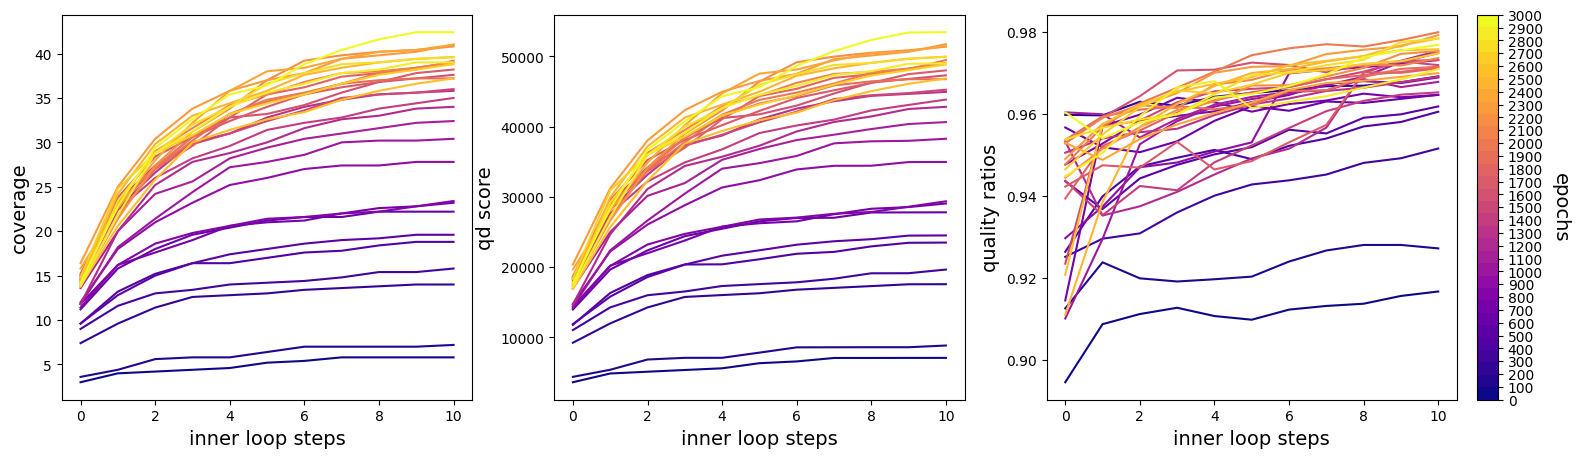

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

total_epochs = list(to_plot.values())[0].shape[0]
epoch_colors = mpl.colormaps['plasma'].resampled(total_epochs)

for ax, (m, v) in zip(axes, to_plot.items()):
    ax.set_ylabel(m.replace('_', ' '), fontsize=14)  # type: ignore
    ax.set_xlabel("inner loop steps", fontsize=14)  # type: ignore

    for i in range(total_epochs):
        ax.plot(list(range(v.shape[1])), v[i], color=epoch_colors(i), label=f"step: {runs[i]}")


l, b, w, h = axes[-1].get_position().bounds

cax_width = w * 0.05
cax_pad = w * 0.05

im = mpl.cm.ScalarMappable(cmap=epoch_colors)
legend_ax = fig.add_axes((l + w + cax_pad, b, cax_width, h))
cbar = plt.colorbar(im, cax=legend_ax)

legend_ax.set_ylabel("epochs", rotation=270, fontsize=14)
legend_ax.yaxis.set_label_coords(4.5,0.5)
legend_ax.set_yticks(np.linspace(0, 1, total_epochs))
legend_ax.set_yticklabels(np.arange(0, 3001,100))

save_file = osp.join(log_folder, run_folder, "analysis", "all_qd.pdf")
fig.savefig(save_file, bbox_inches='tight', dpi=300) 

## Comparision

## Compositionality and Searchability

In [6]:
compositionality_metrics_file = "compositionality.npz"
runs = [20] + list(range(100, 3001, 100))

In [7]:
results = []

for r in runs:
    full_path = osp.join(log_folder, run_folder, metric_folder_template.format(r), compositionality_metrics_file)
    data = np.load(full_path)
    results.append({k: data[k] for k in data})
                    
compositionality_metrics = jtu.tree_map(lambda *v: jnp.stack(v, axis=0), *results)

In [8]:
compositionality_metrics

{'character info gap': Array([0.22405232, 0.22658429, 0.05575196, 0.0877514 , 0.01299592,
        0.07888337, 0.01585579, 0.00828397, 0.03857472, 0.15077367,
        0.15882356, 0.16640568, 0.20999847, 0.1649897 , 0.21071407,
        0.15257946, 0.21464412, 0.17473198, 0.15084581, 0.15211129,
        0.14504018, 0.19276017, 0.16984473, 0.16129158, 0.16337112,
        0.13864821, 0.16280846, 0.16245292, 0.15770605, 0.16116634,
        0.14740074], dtype=float32),
 'dna disentanglement': Array([0.0669801 , 0.08617625, 0.13512301, 0.03668429, 0.00138992,
        0.00779122, 0.02937194, 0.07388171, 0.02302191, 0.02229373,
        0.00298978, 0.01184378, 0.04282301, 0.03234085, 0.02819096,
        0.04486727, 0.07530314, 0.00839627, 0.05155006, 0.17153032,
        0.03344008, 0.01042843, 0.16778938, 0.13688342, 0.01694599,
        0.01115086, 0.02200493, 0.1625644 , 0.03886896, 0.12884358,
        0.18359892], dtype=float32),
 'positon info gap': Array([0.26379043, 0.27160195, 0.04514509, 0

In [20]:
runs = [3000]
metric_folder_files = [
    "different_emitter/qd_metrics.npz", 
    "no_mutation/qd_metrics.npz", 
    "no_crossover/qd_metrics.npz", 
    "dummy/qd_metrics.npz"
]

In [23]:
different_emitter = []
no_mutation = []
no_crossover = []
dummy = []

for r in runs:
    for results, file in zip([different_emitter, no_mutation, no_crossover, dummy], metric_folder_files):
        full_path = osp.join(log_folder, run_folder, metric_folder_template.format(r), file)
        data = np.load(full_path)
        results.append({k: data[k] for k in data})
                    
different_emitter = jtu.tree_map(lambda *v: jnp.stack(v, axis=0), *different_emitter)
no_mutation = jtu.tree_map(lambda *v: jnp.stack(v, axis=0), *no_mutation)
no_crossover = jtu.tree_map(lambda *v: jnp.stack(v, axis=0), *no_crossover)
dummy = jtu.tree_map(lambda *v: jnp.stack(v, axis=0), *dummy)


different_emitter = {k: v for k, v in different_emitter.items() if k in ['qd_score', 'coverage']}
no_mutation = {k: v for k, v in no_mutation.items() if k in ['qd_score', 'coverage']}
no_crossover = {k: v for k, v in no_crossover.items() if k in ['qd_score', 'coverage']}
dummy = {k: v for k, v in dummy.items() if k in ['qd_score', 'coverage']}

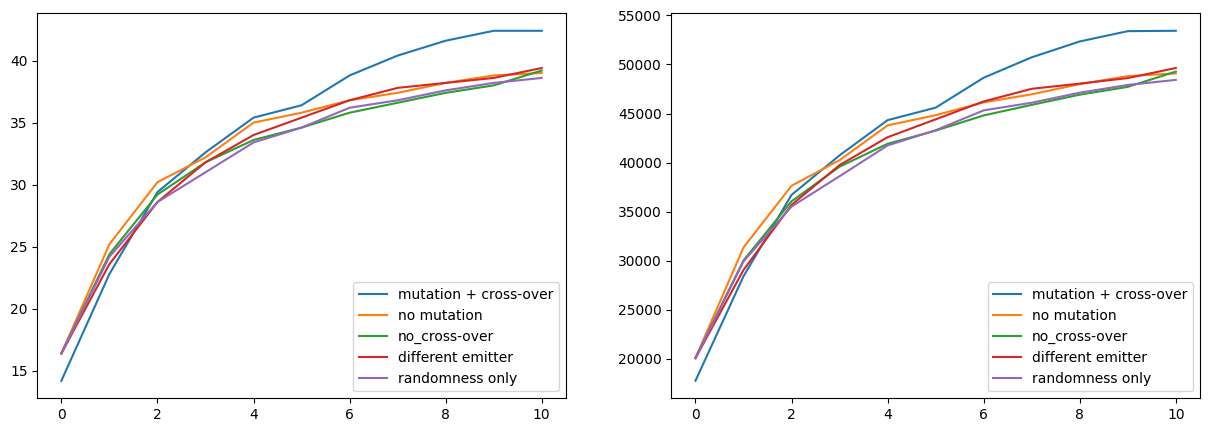

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

for name, metric_dict in zip(['mutation + cross-over', 'no mutation', 'no_cross-over', 'different emitter', 'randomness only'],[to_plot, no_mutation, no_crossover, different_emitter, dummy]):
    for ax, (m, v) in zip(axes, metric_dict.items()):
        ax.plot(range(v.shape[1]), v[-1], label=name)
        
for ax in axes:
    ax.legend()

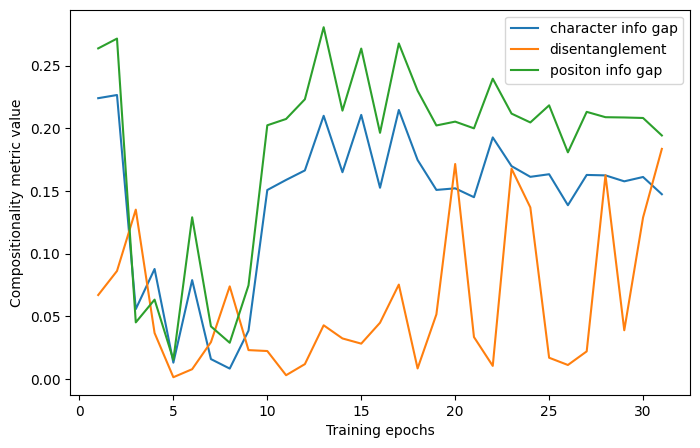

In [86]:
fig, ax = plt.subplots(figsize=(8, 5))

total_epochs = list(compositionality_metrics.values())[0].shape[0]

for m, v in compositionality_metrics.items():
    ax.set_xlabel("Training epochs")  # type: ignore
    ax.set_ylabel("Compositionality metric value")

    ax.plot(range(1, total_epochs +1), v, label=m.replace('_', ' ').replace('dna ', ''))

ax.legend()
    
save_file = osp.join(log_folder, run_folder, "analysis", "compositionality.pdf")
fig.savefig(save_file, bbox_inches='tight', dpi=300) 

## Learning curves

In [79]:
df = pd.read_csv(osp.join(log_folder, run_folder, "analysis", "all_runs_qd_score.csv"), index_col=0)
df = df[df.columns.drop(list(df.filter(regex='__')))]

def index_map(k):
    if '04-03_15-46' in k and 'control' not in k:
        return "CMA-ES + DNA", 'norm states'
    elif '04-03_15-40' in k:
        return "CMA-ES + DNA", 'no norm'
    elif 'sign update' in k and 'control' in k:
        return "continuous", "norm states"
    elif 'sign update' in k and 'control' not in k:
        return "DNA", "norm states"
    elif 'sign update' not in k and 'control' in k:
        return "continuous", "no norm"
    elif 'sign update' not in k and 'control' not in k:
        return "DNA", "norm stats"
    return k

df.columns = pd.MultiIndex.from_tuples([index_map(k) for k in df.columns.tolist()])
df = df.iloc[:3000]

df

Step                            1           2           3           4     \
CMA-ES + DNA norm states   61.869194   59.991955  108.236267  101.933311   
             no norm       37.939377   91.980736  134.920761  193.026535   
continuous   norm states  137.751038  196.351654  224.170074  233.080902   
             norm states  130.327728  162.465668  202.884918  236.033539   
DNA          norm states   45.902893   60.254639   95.984886  104.050995   
             norm states   91.661850  127.833740  187.469620  171.365265   

Step                            5           6           7           8     \
CMA-ES + DNA norm states  126.504631  129.655685  148.177567  153.974701   
             no norm      250.330292  312.602692  306.639496  315.911926   
continuous   norm states  240.771515  217.274887  217.019730  236.497452   
             norm states  239.556351  259.540039  312.855835  276.014954   
DNA          norm states  125.154320  143.239929  166.196198  180.260040   
             norm states  204.959534  292.323761  335.574585  377.559967   

Step                            9           10    ...         2991  \
CMA-ES + DNA norm states  147.084808  152.404678  ...          NaN   
             no norm      327.943024  398.212738  ...          NaN   
continuous   norm states  211.363480  217.480270  ...          NaN   
             norm states  259.335663  281.573761  ...          NaN   
DNA          norm states  182.358246  182.402161  ...  7046.092773   
             norm states  407.610352  417.755676  ...          NaN   

Step                             2992         2993         2994        2995  \
CMA-ES + DNA norm states          NaN          NaN          NaN         NaN   
             no norm              NaN          NaN          NaN         NaN   
continuous   norm states          NaN          NaN          NaN         NaN   
             norm states          NaN          NaN          NaN         NaN   
DNA          norm states  7013.774414  7008.023438  6952.161133  6876.78418   
             norm states          NaN          NaN          NaN         NaN   

Step                             2996         2997         2998         2999  \
CMA-ES + DNA norm states          NaN          NaN          NaN          NaN   
             no norm              NaN          NaN          NaN          NaN   
continuous   norm states          NaN          NaN          NaN          NaN   
             norm states          NaN          NaN          NaN          NaN   
DNA          norm states  6954.943359  6918.528809  6910.822266  6944.100098   
             norm states          NaN          NaN          NaN          NaN   

Step                             3000  
CMA-ES + DNA norm states          NaN  
             no norm              NaN  
continuous   norm states          NaN  
             norm states          NaN  
DNA          norm states  6920.537598  
             norm states          NaN  

[6 rows x 3000 columns]

/var/folders/2k/6pknr91n5nq0v39d9mv1_n9m0000gn/T/ipykernel_77075/4196638588.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.plot(ax=ax, legend=False)
/var/folders/2k/6pknr91n5nq0v39d9mv1_n9m0000gn/T/ipykernel_77075/4196638588.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.plot(ax=ax, legend=False)
/var/folders/2k/6pknr91n5nq0v39d9mv1_n9m0000gn/T/ipykernel_77075/4196638588.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.plot(ax=ax, legend=False)
/var/folders/2k/6pknr91n5nq0v39d9mv1_n9m0000gn/T/ipykernel_77075/4196638588.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.plot(ax=ax, legend=False)
/var/folders/2k/6pknr91n5nq0v39d9mv1_n9m0000gn/T/ipykernel_77075/4196638588.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.plot(ax=ax, legend=False)
/var/folders/2k/6pknr91n5nq0v39d9mv1_n9m0000gn/T/ipykernel_77075/4196638588

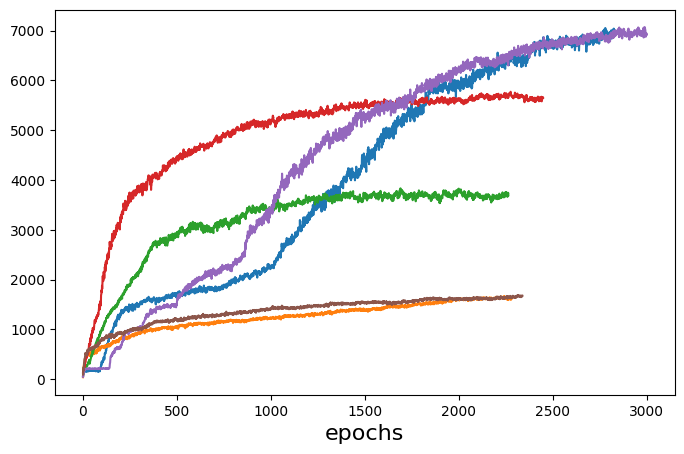

In [85]:
fig, ax = plt.subplots(figsize=(8, 5))

df.plot(ax=ax, legend=False)
# ax.legend(bbox_to_anchor=(1.0, 1.0))

ax.set_xlabel('epochs', fontsize=16)
# ax.set_ylabel('qd scores', fontize=16)

fig.savefig(osp.join(log_folder, run_folder, "analysis", "all_runs_qd_score.pdf"), bbox_inches='tight')